# DSC550-T301 Data Mining

## Week 2: 2.2 Exercise: Graph Analysis with Matplotlib / Daniel Solis Toro

### Fast food Nutrition Dataset (Kaggle)

The Fast Food Nutrition dataset contains nutritional information for menu items from six major fast-food restaurants. The dataset includes values for calories, macronutrients (fat, carbohydrates, and protein), and selected micronutrients such as sodium and cholesterol. This dataset is useful for understanding the nutritional quality of commonly consumed fast-food items and for comparing how different restaurants vary in calorie content and nutrient composition. Analyzing this data can help identify healthier menu choices and highlight patterns in how fast food contributes to daily nutrient intake.

Import data set and clean column names

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("FastFoodNutritionMenuV3.csv")

# Preview columns to confirm names loaded correctly
df.columns
print(df.columns)

# Cleaning column names
df.columns = (
    df.columns
    .str.lower()                              # make lowercase
    .str.replace("\n", " ", regex=True)        # remove line breaks
    .str.replace(r"\((g|mg)\)", "", regex=True) # remove units (g) and (mg)
    .str.replace(r"[()]", "", regex=True)      # remove leftover parentheses
    .str.replace(" ", "_")                     # replace spaces with underscores
    .str.replace("__+", "_", regex=True)       # remove double underscores
    .str.strip("_")                            # trim leading/trailing underscores
)

# Show results
print(df.columns)

# Convert relevant columns to numeric (force errors to NaN)
numeric_cols = ['calories', 'protein', 'sodium']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


Index(['Company', 'Item', 'Calories', 'Calories from\nFat', 'Total Fat\n(g)',
       'Saturated Fat\n(g)', 'Trans Fat\n(g)', 'Cholesterol\n(mg)',
       'Sodium \n(mg)', 'Carbs\n(g)', 'Fiber\n(g)', 'Sugars\n(g)',
       'Protein\n(g)', 'Weight Watchers\nPnts'],
      dtype='object')
Index(['company', 'item', 'calories', 'calories_from_fat', 'total_fat',
       'saturated_fat', 'trans_fat', 'cholesterol', 'sodium', 'carbs', 'fiber',
       'sugars', 'protein', 'weight_watchers_pnts'],
      dtype='object')


### Questions to explore the data set 

1. Which fast-food restaurant has the highest average calorie content per menu item?

2. Are higher-protein items also higher in calories?

3. Which restaurants offer lower-sodium options on average?






### Fast-food restaurant average calorie content 

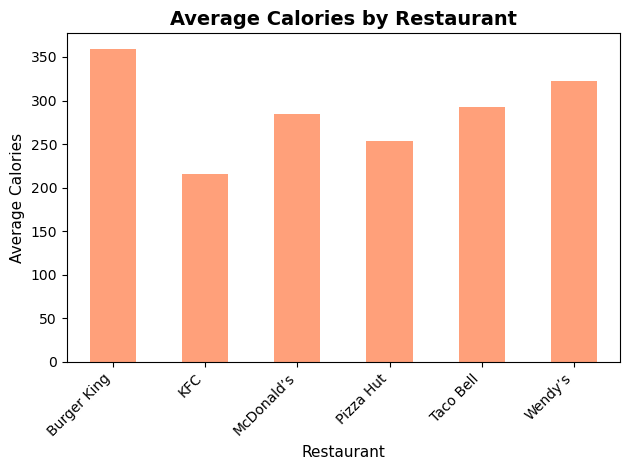

In [38]:
# Group and calculate averages
avg_calories = df.groupby('company')['calories'].mean()

# Plot
plt.figure()
avg_calories.plot(kind='bar', color= "lightsalmon")

plt.title('Average Calories by Restaurant', fontsize=14, fontweight='bold')
plt.xlabel('Restaurant', fontsize=11)
plt.ylabel('Average Calories', fontsize=11)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


### Higher-Protein VS Higher-calories

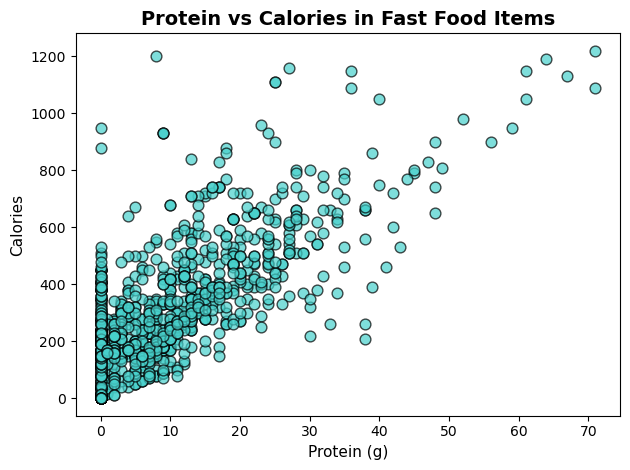

Correlation between protein and calories: 0.742269021768022


In [40]:
plt.figure()
plt.scatter(
    df['protein'],
    df['calories'],
    color= "mediumturquoise",
    alpha=0.7,
    s=60,
    edgecolors='black'
)

plt.title('Protein vs Calories in Fast Food Items',
          fontsize=14,
          fontweight='bold')

plt.xlabel('Protein (g)', fontsize=11)
plt.ylabel('Calories', fontsize=11)

plt.tight_layout()
plt.show()

# Correlation analysis 
correlation = df['protein'].corr(df['calories'])
print("Correlation between protein and calories:", correlation)


### Lower-sodium options

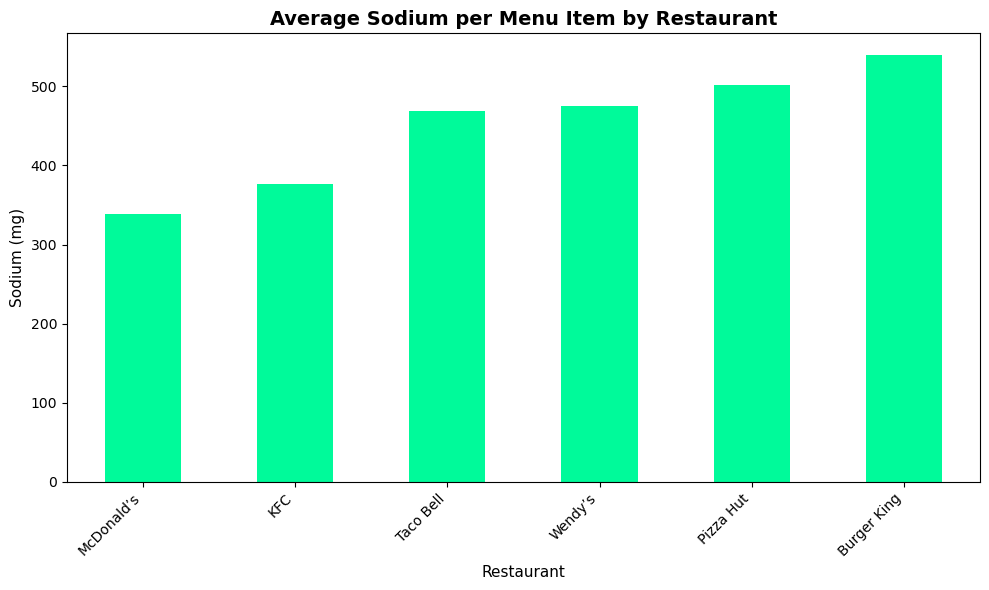

In [42]:
avg_sodium = df.groupby('company')['sodium'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_sodium.plot(
    kind='bar',
    color= 'mediumspringgreen'
)
plt.title('Average Sodium per Menu Item by Restaurant',
         fontsize=14, 
         fontweight='bold')

plt.xlabel('Restaurant', fontsize=11)
plt.ylabel('Sodium (mg)', fontsize=11)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Findings Summary
1. Caloric Density by Restaurant
- Burger King offers menu items with the highest average calorie content (approximately 360 calories per item).
- KFC maintains the lowest average calorie profile (approximately 210 calories per item).

2. Protein-Calorie Relationship
- Scatter plot analysis reveals a clear positive relationship between protein content and total calories, with data points clustering along an upward trendline.
- This visual pattern is quantitatively confirmed by a strong positive correlation coefficient of r = 0.74, indicating that higher-protein menu items consistently tend to be more calorie-dense.

3. Sodium Content Comparison
- McDonald's offers items with the lowest average sodium content, suggesting potentially healthier options for sodium-conscious consumers.
- Burger King items contain the highest average sodium levels, which aligns with their higher calorie content.

### Conclusion

Based on our analysis of major fast-food restaurants, clear nutritional trade-offs exist across different chains. Burger King emerges as the most calorie- and sodium-dense option, which may appeal to consumers seeking more indulgent meals but presents challenges for health-conscious diners. The strong correlation between protein and calories suggests that while protein-rich items offer nutritional benefits, they often come with higher caloric costs.

For consumers seeking specific nutritional profiles:
- Calorie-conscious choices: KFC offers the lowest average calories
- Sodium management: McDonald's provides lower-sodium options
- Protein optimization: Requires careful selection due to the protein-calorie correlation

These findings underscore the importance of informed menu selection and suggest that no single restaurant dominates all nutritional categories. Future menu innovations could focus on decoupling protein from excessive calories and sodium to offer more balanced nutritional options.

